# Exercise 05


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

# Integrantes

* Juan Sebastian Rincón H. - 201214767
* Angie Paola Chacón - 201012536
* Alexander Camargo - 200911325
* Juan Fernando Ortiz - 200623117

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

%matplotlib inline

## Cargue de la base de datos y gráfica de los datos

In [2]:
#Lectura de la base de datos. Se crea df con la variable 'y' ya transformada a logaritmo
retail = pd.read_csv('example_retail_sales.csv', sep = ',')
df = pd.DataFrame()
df['ds'] = pd.to_datetime(retail['ds'])
df['y'] = np.log(retail['y'])


In [3]:
df.head()
df.tail()

,ds,y
288,2016-01-01,12.901537
289,2016-02-01,12.932543
290,2016-03-01,13.039184
291,2016-04-01,13.019078
292,2016-05-01,13.063507


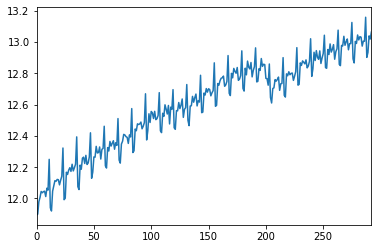

In [4]:
df['y'].plot()

In [5]:
result = adfuller(df['y'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.124095
p-value: 0.024821
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572


#### Por la Función de Autocorrelación Simple y Parcial y su representación en ACF y el PACF, es posible inferir que la serie tiene un término autorregresivo de orden

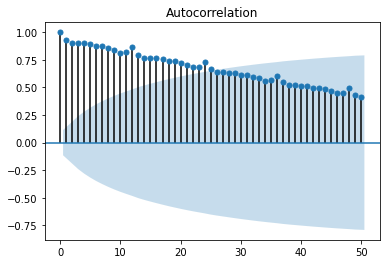

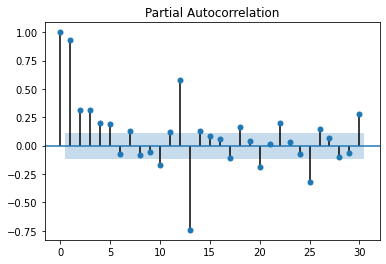

In [6]:
plot_acf(df['y'], lags=50);
plot_pacf(df['y'], lags=30);

In [ ]:
#Se diferencia una vez
#df['y'] = df['y'].diff()


### Siguiendo los resultados del ADF, diferenciar el 'y' hace estacionaria nuestra serie

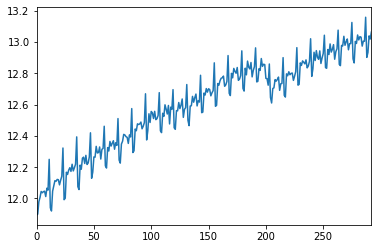

In [7]:
df['y'].plot()

In [8]:
df['y'].mean()

12.599049266475022

In [9]:
df.head()

,ds,y
0,1992-01-01,11.893934
1,1992-02-01,11.898725
2,1992-03-01,11.978770
3,1992-04-01,12.005601
4,1992-05-01,12.043954


In [10]:
df.tail()

,ds,y
288,2016-01-01,12.901537
289,2016-02-01,12.932543
290,2016-03-01,13.039184
291,2016-04-01,13.019078
292,2016-05-01,13.063507


### Se corre Prophet sobre el logaritmo de las ventas

In [11]:
len(df)

293

In [1]:
#Prophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods = 6, freq = 'M')
forecast = m.predict(future)
forecast[['ds','yhat', 'yhat_lower','yhat_upper']].iloc[-10:]

NameError: name 'df' is not defined

### Para que los datos guarden correspondencia, se le agrega un día a las fechas mostradas por Prophet

In [13]:
# Sumarle un día a las fechas sacadas con future después de hacer el forecast

from datetime import datetime
from datetime import timedelta
forecast['ds'].iloc[-6:] =forecast['ds'].iloc[-6:] + timedelta(days=1)

C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [15]:
forecast['ds'].iloc[-10:]

289   2016-02-01
290   2016-03-01
291   2016-04-01
292   2016-05-01
293   2016-06-01
294   2016-07-01
295   2016-08-01
296   2016-09-01
297   2016-10-01
298   2016-11-01
Name: ds, dtype: datetime64[ns]

#### La siguiente gráfica muestra el resultado del pronóstico para los próximos seis periodos. Las predicciones guardan corresóndencia con la tendencia, la varianza y la estacionareidad observada previamente

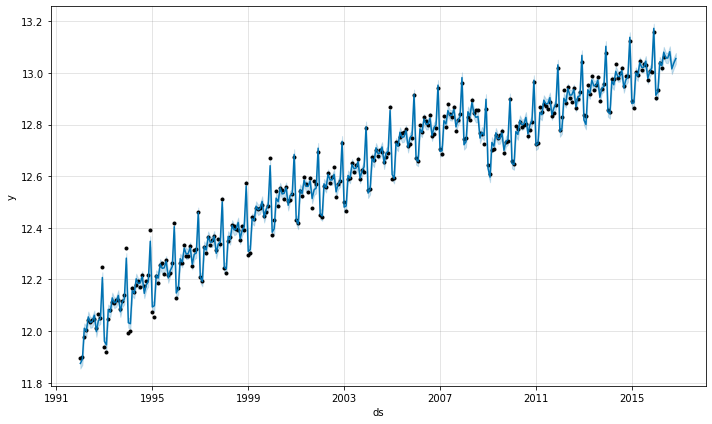

In [16]:
fig1 = m.plot(forecast)

#### Características de la serie: tendencia positiva

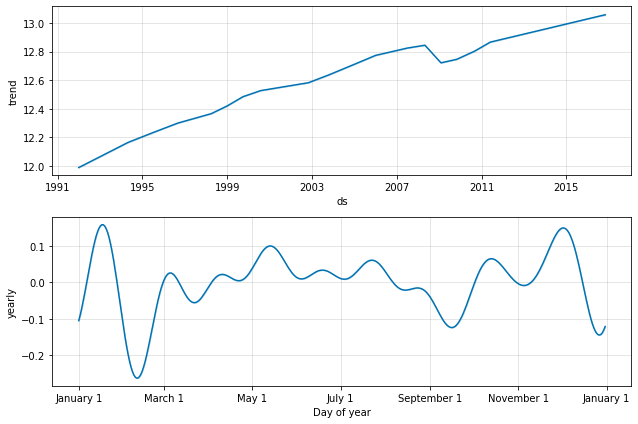

In [17]:
m.plot_components(forecast);

### AA continuación se desarrolla el ejercicio para pronosticar la serie por medio del rolling forecast

#### Se definen train y test

In [147]:
X = df.values
size = int(len(X) * 0.9)
size

263

In [159]:
train, test = X[0:size], X[size:len(df)]

In [160]:
test1 =pd.DataFrame(test)

In [162]:
test1.columns = ['ds', 'y']

In [163]:
test1['ds'] = pd.to_datetime(test1['ds'])

In [367]:
train1 =pd.DataFrame(train)
train1.columns = ['ds', 'y']
train1['ds'] = pd.to_datetime(train1['ds'])

In [369]:
len(train1)

263

In [365]:
len(test1)

30

In [375]:
import warnings
warnings.filterwarnings("ignore")

history = [x for x in train1]
print(history)

['ds', 'y']


### Construcción del rolling forecast con Prophet.

#### Para esta sección se le imputa un rango l al algoritmo que va de 1 a 6.

In [397]:
prediccion = pd.DataFrame(columns = ['ds', 'yhat', 'yhat_lower','yhat_upper'])
for l in range(7):
    for t in range(len(test1)):
        model = Prophet(n_changepoints = 1)
        model_fit = model.fit(train1)
        future = model.make_future_dataframe(periods = l , freq = 'M')
        forecast = model.predict(future)
        forecast['ds'].iloc[-6:] =forecast['ds'].iloc[-6:] + timedelta(days=1)
        #print(len(forecast))
        obs = pd.DataFrame(test1[['ds','y']].iloc[:l])
prediccion = prediccion.append(forecast[['ds', 'yhat', 'yhat_lower','yhat_upper']])

print(prediccion)

        #train1 = train1.append(obs, ignore_index = True)
        #prediccion = prediccion.append(forecast[['ds', 'yhat', 'yhat_lower','yhat_upper']])
        #yhat =pd.DataFrame(forecast[['yhat'][-1:]])
        #predictions.append(yhat)
        

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

            ds       yhat  yhat_lower  yhat_upper
0   1992-01-01  11.959332   11.894100   12.028253
1   1992-02-01  11.976983   11.911329   12.050119
2   1992-03-01  12.095633   12.028246   12.161077
3   1992-04-01  12.079790   12.011527   12.145257
4   1992-05-01  12.133931   12.067801   12.204044
5   1992-06-01  12.107454   12.038519   12.180506
6   1992-07-01  12.111094   12.037811   12.180128
7   1992-08-01  12.133306   12.070945   12.201076
8   1992-09-01  12.069498   12.005163   12.139211
9   1992-10-01  12.110308   12.042000   12.176418
10  1992-11-01  12.114555   12.046037   12.179814
11  1992-12-01  12.268678   12.199452   12.335301
12  1993-01-01  12.015754   11.949873   12.080022
13  1993-02-01  11.997025   11.932783   12.067119
14  1993-03-01  12.136515   12.066222   12.208517
15  1993-04-01  12.123019   12.058055   12.190590
16  1993-05-01  12.177087   12.112167   12.245605
17  1993-06-01  12.155925   12.090244   12.224296
18  1993-07-01  12.156963   12.088430   12.219445


#### La longitud del DataFrame predicción guarda correspondencia con la sumatoria del train +  test + los próximos seis periodos que se intenta predecir

In [392]:
prediccion

,ds,yhat,yhat_lower,yhat_upper
0,1992-01-01,11.959332,11.894582,12.025545
1,1992-02-01,11.976983,11.907805,12.042970
2,1992-03-01,12.095633,12.023459,12.163275
3,1992-04-01,12.079790,12.013186,12.148213
4,1992-05-01,12.133931,12.071339,12.197105
5,1992-06-01,12.107454,12.041994,12.175396
6,1992-07-01,12.111094,12.044962,12.182165
7,1992-08-01,12.133306,12.067243,12.205761
8,1992-09-01,12.069498,12.001965,12.135270
9,1992-10-01,12.110308,12.041091,12.177831


#### La raíz del error cuadrado medio es de 0.098. En comparación con la última predicción, se entendería que existe un error de 0,75%

In [421]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test1['y'], prediccion['yhat'].iloc[-30:]) **0.5
print('Test MSE: %.3f' % error)

Test MSE: 0.098


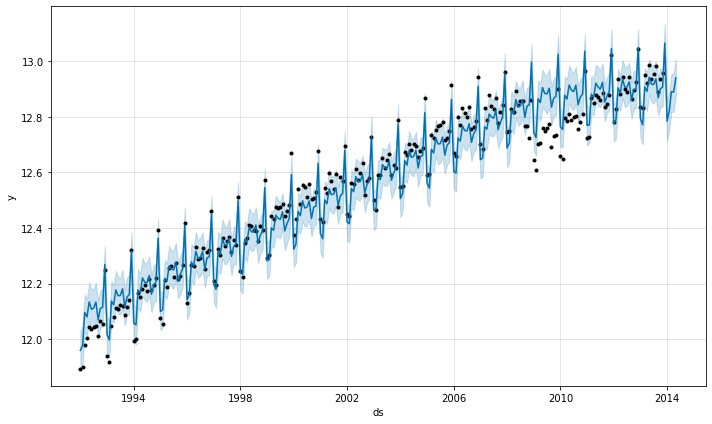

In [423]:
fig2 = model.plot(prediccion)

### Como parte del ejercicio, se procede a pronosticar, por medio de Prophet, los próximos seis periodos para la serie de ventas en sus unidades originales

In [424]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(retail['ds'])
df['y'] = retail['y']


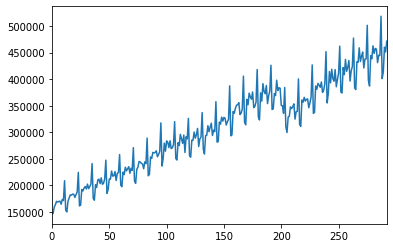

In [425]:
df['y'].plot()

In [426]:
X = df.values
size = int(len(X) * 0.9)
size
train, test = X[0:size], X[size:len(df)]

In [427]:
test2 =pd.DataFrame(test)
test2.columns = ['ds', 'y']
test2['ds'] = pd.to_datetime(test2['ds'])

In [428]:
train2 =pd.DataFrame(train)
train2.columns = ['ds', 'y']
train2['ds'] = pd.to_datetime(train2['ds'])

In [ ]:
prediccion = pd.DataFrame(columns = ['ds', 'yhat', 'yhat_lower','yhat_upper'])
for l in range(7):
    for t in range(len(test2)):
        model = Prophet(n_changepoints = 1)
        model_fit = model.fit(train2)
        future = model.make_future_dataframe(periods = l , freq = 'M')
        forecast = model.predict(future)
        forecast['ds'].iloc[-6:] =forecast['ds'].iloc[-6:] + timedelta(days=1)
        obs = pd.DataFrame(test2[['ds','y']].iloc[:l])
prediccion = prediccion.append(forecast[['ds', 'yhat', 'yhat_lower','yhat_upper']])
print(prediccion)
#print(obs)
#print(prediccion)
        #train1 = train1.append(obs, ignore_index = True)
        #prediccion = prediccion.append(forecast[['ds', 'yhat', 'yhat_lower','yhat_upper']])
        #yhat =pd.DataFrame(forecast[['yhat'][-1:]])
        #predictions.append(yhat)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

            ds           yhat     yhat_lower     yhat_upper
0   1992-01-01  135961.782554  117329.887280  153471.188601
1   1992-02-01  140795.192650  123218.532864  157707.846946
2   1992-03-01  174084.652706  156821.425592  190232.376737
3   1992-04-01  167311.359705  148274.129530  185098.221425
4   1992-05-01  183313.899134  165496.852446  201225.975595
5   1992-06-01  174416.159560  156573.108162  192025.499588
6   1992-07-01  175427.179750  158779.801553  193747.346953
7   1992-08-01  182599.083516  165304.878681  201087.905574
8   1992-09-01  163047.765076  145536.932333  181068.061624
9   1992-10-01  174206.807078  156556.206911  193254.920393
10  1992-11-01  176158.304317  159402.574832  193573.419820
11  1992-12-01  222473.936403  205087.354054  239690.693498
12  1993-01-01  149655.541997  131364.946027  167464.815055
13  1993-02-01  144430.905582  127359.973213  160904.813464
14  1993-03-01  183696.334468  166829.224492  200422.896328
15  1993-04-01  178386.121253  159222.62

### A comparación del MSE delo modelo ARIMA, se observa una disminución considerable del error promedio de las estimaciones por medio de Prophet.

In [432]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test2['y'], prediccion['yhat'].iloc[-30:]) **0.5
print('Test MSE: %.3f' % error)

Test MSE: 35545.785


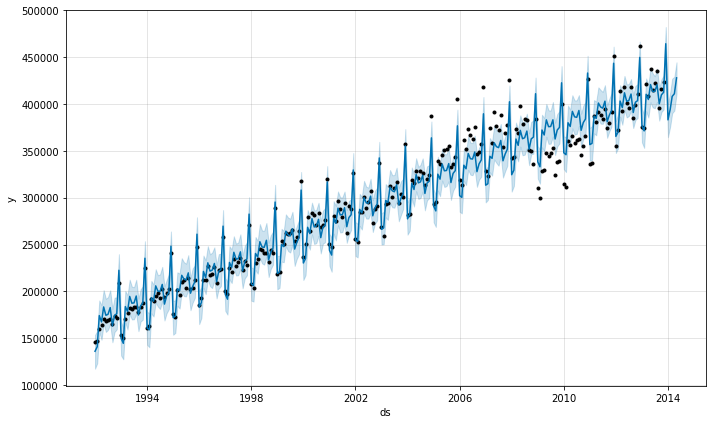

In [434]:
fig2 = model.plot(forecast)